In [1]:
import numpy as np
import random
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def fill(type):
    z = np.zeros(shape=(TN, Nx))

    if type == 1:
        for i in range(Nx):
            if i < int(Nx / 2):
                z[0][i] = i * dx * umax / (Lengt/2)
            elif i >= int(Nx / 2):
                z[0][i] = (Nx - i) * dx * umax / (Lengt/2)
    elif type == 2:
        for i in range(Nx):
            if i > int(Nx / 4) and i < int(Nx / 2):
                z[0][i] = (i - int(Nx / 4)) * dx * umax / (Lengt/2)
            elif i >= int(Nx / 2) and i < int(Nx / 4 * 3):
                z[0][i] = (Nx - i - int(Nx / 4)) * dx * umax / (Lengt/2)
    elif type == 3:
        for i in range(Nx):
            if i > int(Nx / 4) - int(Nx/5) and i < int(Nx / 2) - int(Nx/5):
                z[0][i] = (i - int(Nx / 4) + int(Nx/5)) * dx * umax / (Lengt/2)
            elif i >= int(Nx / 2) - int(Nx/5) and i < int(Nx / 4 * 3) - int(Nx/5):
                z[0][i] = (Nx - i - int(Nx / 4) - int(Nx/5)) * dx * umax / (Lengt/2)
    elif type == 4:
        for i in range(Nx):
            if i >= int(Nx / 10 * 2) and i < int(Nx / 10 * 3):
                z[0][i] = umax / 5
            elif i >= int(Nx / 10 * 3) and i < int(Nx / 10 * 4):
                z[0][i] = umax / 5 * 2
            elif i >= int(Nx / 10 * 4) and i < int(Nx / 10 * 5):
                z[0][i] = umax / 5
            else:
                z[0][i] = 0

    return z

In [3]:
Lengt = 1
dx = 0.01
Time = 20
dt = 0.01

umax = 0.005

TN = (int)(Time/dt)
Nx = (int)(Lengt/dx)
type = 4
z = fill(type)

zatuhanie = True
dopname = ""
if zatuhanie:
    dopname = "zatuhanie_"
γ = 0.00002

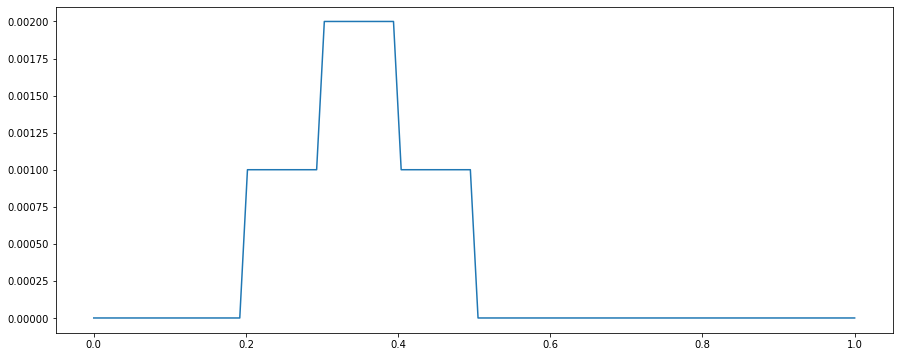

In [4]:
x = np.linspace(0, Lengt, Nx)

plt.figure(figsize=(15, 6))
plt.plot(x, z[0])
plt.savefig(dopname+"startState" + str(type) + ".png")

## Изначальная формула
![title](Formula.png)
## Формула для нахождения U(i+1,j)
![title](Formula2.png)

In [5]:
O = 2

a = dt / dx / O

print(a)
a = a**2

for t in range(1, TN):
    for i in range(1, Nx-1):
        if t > 1:
            z[t][i] = a * (z[t - 1][i + 1] - 2*z[t - 1][i] + z[t - 1][i - 1]) + 2*z[t-1][i] - z[t - 2][i]
            if zatuhanie:
                z[t][i] -= γ * (z[t-1][i] - z[t-2][i]) / dt
        else:
            z[t][i] = z[0][i]


0.5


In [ ]:
fig = go.Figure(data=[go.Surface(z=z, x=x, y=np.linspace(0, Time, TN), colorscale = 'Rainbow')])

fig.update_layout(title='Struna',
                  autosize=False,
                  width=1000, height=1000)

fig.update_layout(scene = dict(zaxis = dict(range=[-0.02,0.02],),))


fig.update_layout(width=800, height=800)
fig.write_image(dopname+"3dplot" + str(type) + ".png")
fig.show()

#Результат
![](Plot1.png)

In [7]:
frames = []
for i in range(TN):
  frames.append(go.Frame(data=[go.Scatter(x=x, y=z[i])]))

In [ ]:
fig = go.Figure(data=[go.Scatter(x=np.linspace(0, Lengt, (int)(Lengt/dx)), y=z[0])],
                layout=go.Layout(
                    xaxis=dict(range=[0, Lengt], autorange=False),
                    yaxis=dict(range=[-0.01, 0.013], autorange=False),
                    title="Start Title",
                    updatemenus=[dict(
                        type="buttons",
                        buttons=[dict(label="Play",
                                      method="animate",
                                      args=[None, {"frame": {"duration": 10, "redraw": False},
                                                   "fromcurrent": True, "transition": {"duration": 0,
                                                                                       "easing": "quadratic-in-out"}}]),
                                 dict(label="Pause",
                                      method="animate",
                                      args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                     "mode": "immediate",
                                                     "transition": {"duration": 0}}]

                                      )])]
                ),
                frames=frames
                )

fig.update_layout(title='Struna', autosize=False,
                  width=1000, height=500)
fig.show()

## Тут будет выведена анимация
## Ниже сохранение этой анимации в график

In [9]:
import gif

@gif.frame
def plot(i):
    f = go.Figure(data=[go.Scatter(x=x, y=z[i])],
                  layout=go.Layout(
                      xaxis=dict(range=[0, Lengt], autorange=False),
                      yaxis=dict(range=[-0.01, 0.01], autorange=False)))
    return f

# Construct list of frames
frames = []
for i in range(TN):
    frame = plot(i)
    frames.append(frame)


In [10]:

gif.save(frames, dopname+'_Gif' + str(type) + '.gif', duration=1)

#import imageio

#gif_original = '_Gif' + str(type) + '.gif'
#gif_speed_up = 'Gif' + str(type) + '.gif'

#gifs = imageio.mimread(gif_original, memtest = False)


In [11]:

#imageio.mimsave(gif_speed_up, gifs, duration=0.02)

## Процесс колебания
![](ezgif.com-gif-maker.gif)

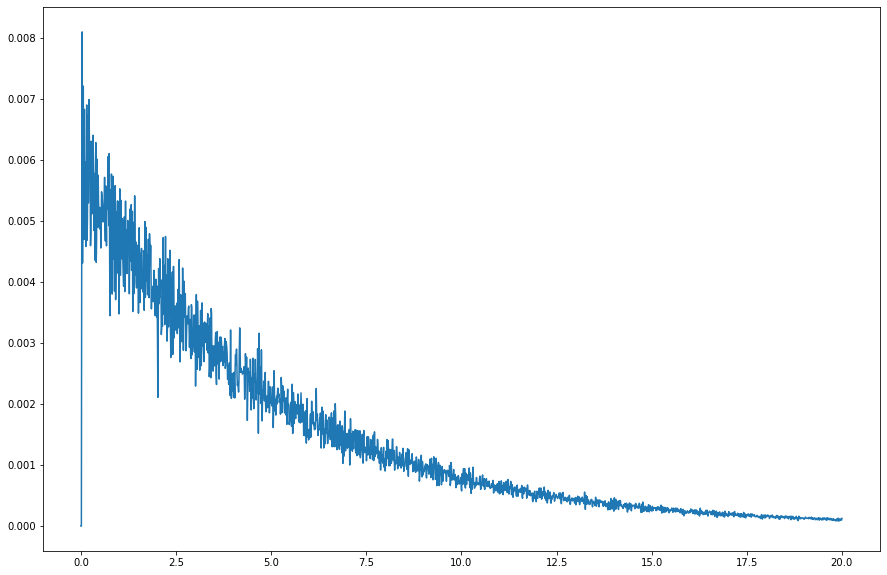

In [12]:
sound = np.zeros(TN)
for i in range(1, TN):
    for j in range(Nx):
        sound[i] += ((z[i][j] - z[i - 1][j]) / dt)**2
        
plt.figure(figsize=(15, 10)) 
plt.plot(np.linspace(0, Time, TN), sound)
plt.savefig(dopname+"sound" + str(type) + ".png")

In [13]:
from scipy.fft import fft, fftfreq
if zatuhanie == False:
    F_result = fft(sound)
    xf = fftfreq(TN, dt)[:TN//2]
    plt.figure(figsize=(15, 10)) 
    #plt.xlim(0,35)
    plt.ylim(0,0.0005)
    plt.plot(xf, 2.0/TN * np.abs(F_result[0:TN//2]))
    plt.grid()
    plt.savefig(dopname+"spectr" + str(type) + ".png")
    plt.show()
else:
    yfft = []
    step = 10
    fftsize = 200
    xfft = fftfreq(fftsize, dt)[:fftsize//2]
    
    for i in range(int(TN / step - fftsize / step)):
        F_result = fft(sound[i * step : i * step + fftsize])
        yfft.append(2.0/fftsize * np.abs(F_result[0:fftsize//2]))

        #plt.plot(xfft,yfft[i])
        #plt.show()
        
    @gif.frame
    def fftplot(i):
        f = go.Figure(data=[go.Scatter(x=xfft, y=yfft[i])],
                      layout=go.Layout(
                          xaxis=dict(range=[0, 50], autorange=False),
                          yaxis=dict(range=[0, 0.001], autorange=False)))
        return f

    # Construct list of frames
    frames = []
    for i in range(len(yfft)):
        frame = fftplot(i)
        frames.append(frame)

    gif.save(frames, dopname+'_spectr_Gif' + str(type) + '.gif', duration=100)

In [14]:
"""frames = []
for i in range(TN):
  frames.append(go.Frame(data=[go.Scatter(x=x, y=z[i],
    marker = dict(size = sound[i]))]))"""

'frames = []\nfor i in range(TN):\n  frames.append(go.Frame(data=[go.Scatter(x=x, y=z[i],\n    marker = dict(size = sound[i]))]))'